In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# sns.set_theme(style="ticks")

In [2]:
df = pd.read_csv('placement_data.csv').drop(['sl_no', 'salary'], axis=1)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [3]:
cnt = 0

for idx, row in enumerate(df['status']):
    if row == 'Not Placed':
        cnt += 1
        if cnt % 2 != 0:
            df = df.drop(index = idx)

In [4]:
for feature in ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']:
    print(df[feature].value_counts())
    print()


gender
M    120
F     61
Name: count, dtype: int64

ssc_b
Central    95
Others     86
Name: count, dtype: int64

hsc_b
Others     113
Central     68
Name: count, dtype: int64

hsc_s
Commerce    95
Science     77
Arts         9
Name: count, dtype: int64

degree_t
Comm&Mgmt    123
Sci&Tech      50
Others         8
Name: count, dtype: int64

workex
No     111
Yes     70
Name: count, dtype: int64

specialisation
Mkt&Fin    108
Mkt&HR      73
Name: count, dtype: int64

status
Placed        148
Not Placed     33
Name: count, dtype: int64



In [5]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,181.000000,181.000000,181.000000,181.000000,181.000000
mean,69.241492,67.802099,67.246464,72.531105,62.551271
std,10.245513,10.262851,7.258272,13.521709,5.816748
min,40.890000,37.000000,50.000000,50.000000,51.290000
25%,62.000000,62.000000,64.000000,60.000000,57.990000
50%,69.000000,66.000000,66.890000,71.000000,62.360000
75%,77.000000,73.500000,72.000000,84.000000,66.530000
max,89.400000,97.700000,91.000000,98.000000,77.890000


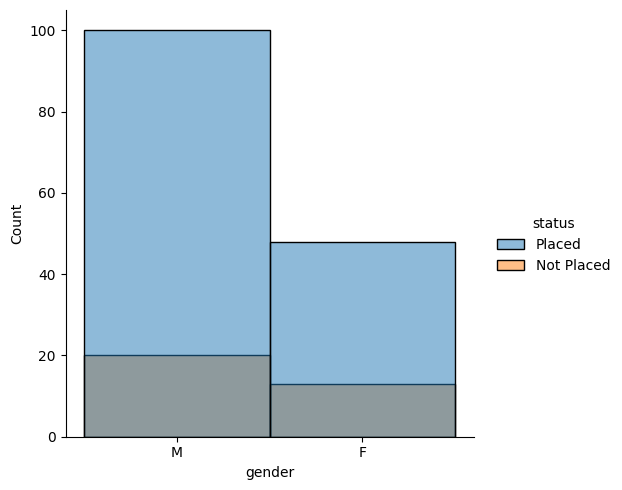

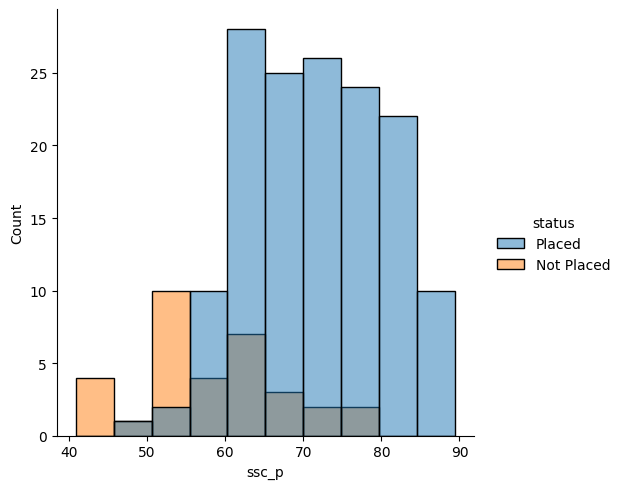

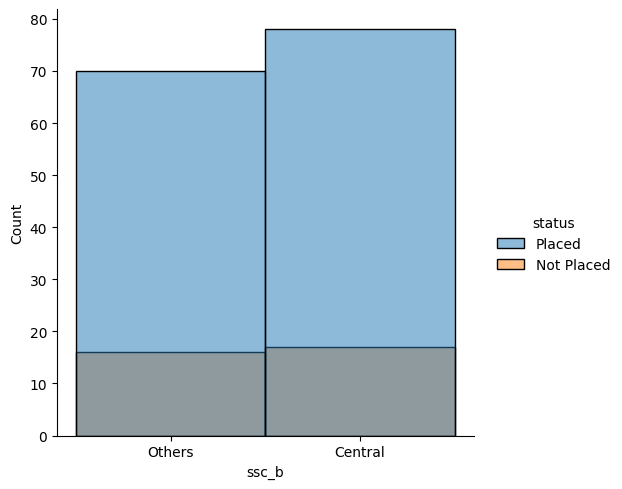

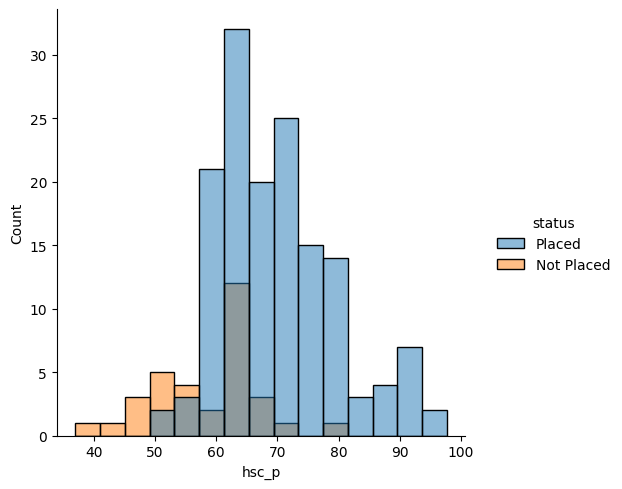

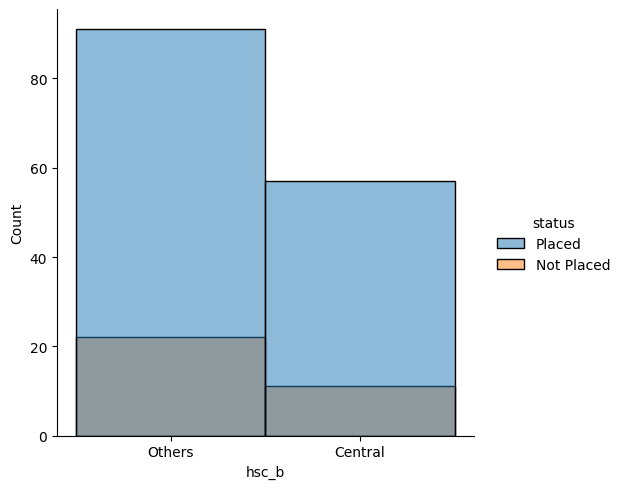

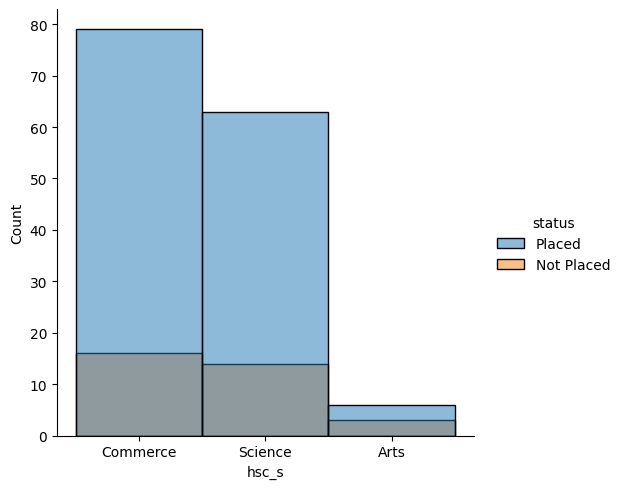

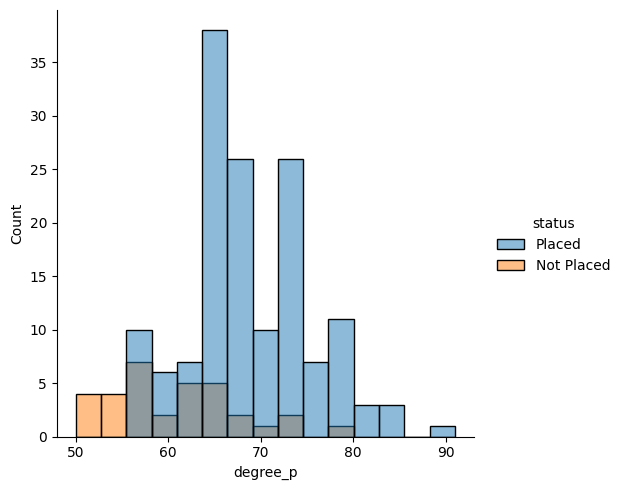

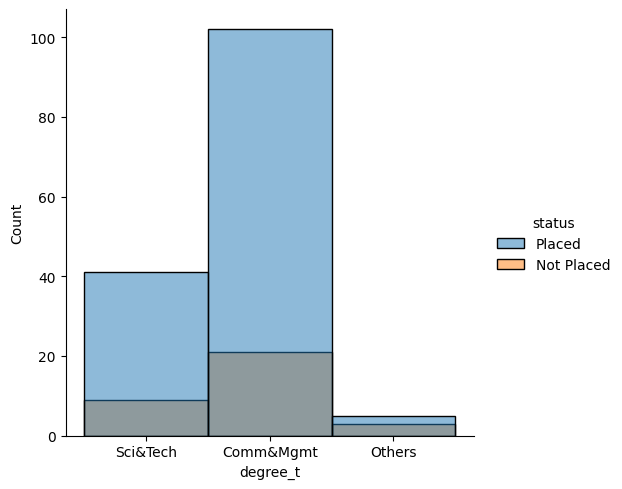

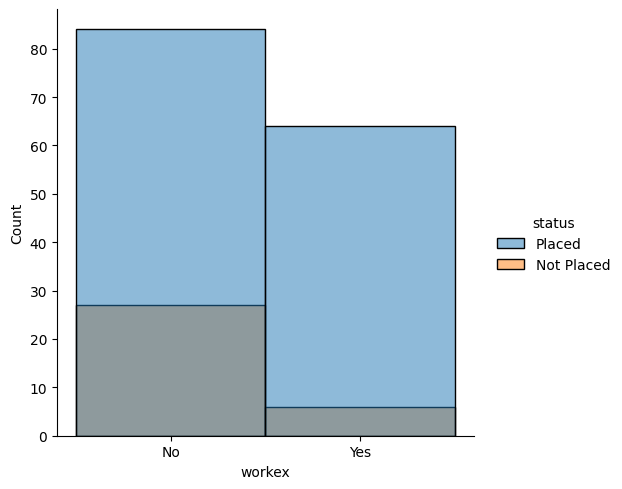

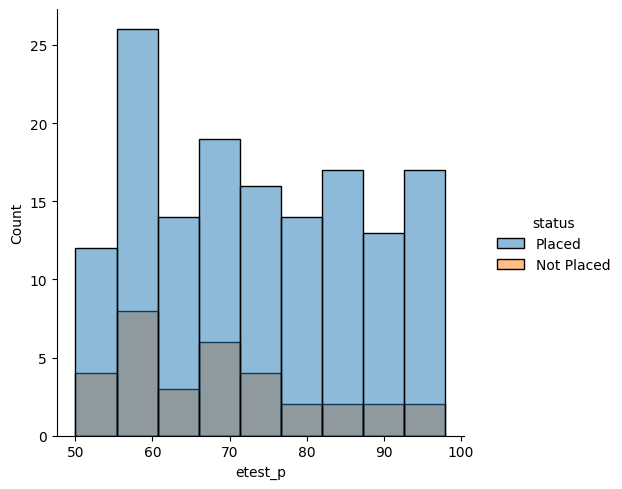

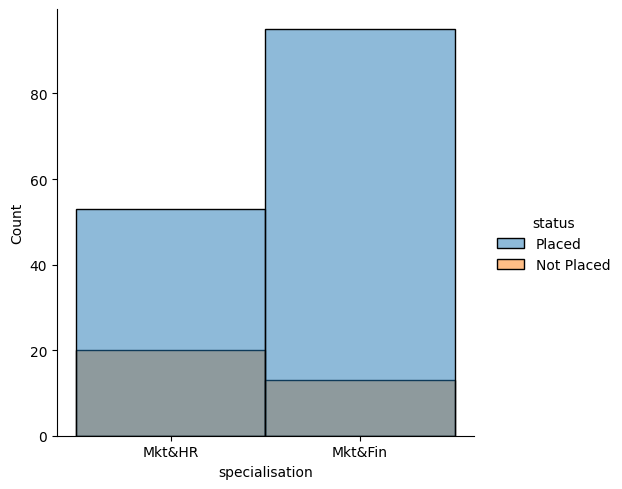

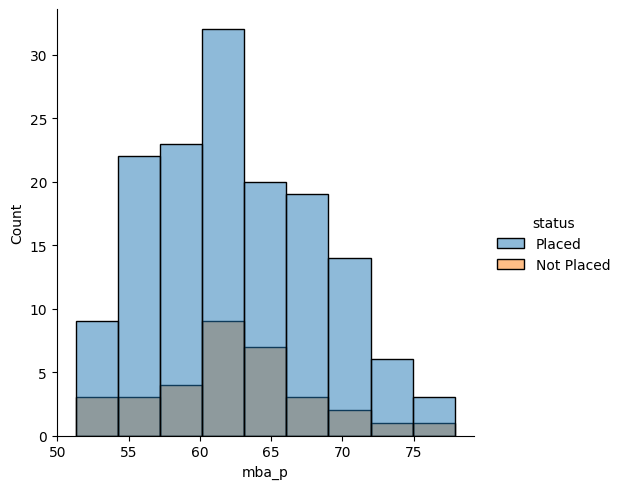

In [6]:
for feature in list(df.columns.drop('status')): 
    sns.displot(
        data = df,
        x = feature,
        hue = 'status'
    )

# Task 1/2

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_le = df.copy()

for feature in ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']:
    df_le[feature] = label_encoder.fit_transform(df_le[feature])

df_le

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,62.00,0,72.00,0,1,65.00,0,0,67.0,0,56.49,1
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1


In [8]:
from sklearn.model_selection import train_test_split

X = df_le.drop(['status'], axis = 1)
y = df_le['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=666)

In [9]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=180, max_depth=3, learning_rate=0.1, random_state=666, objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, random_state=666, ...)

In [10]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print(f"Точность: {precision}")
print(f"Полнота: {recall}")
print(f"Специфичность: {specificity}")

Точность: 0.96
Полнота: 0.9230769230769231
Специфичность: 0.8


# Task 3 

In [11]:
def show_roc(y_test, y_pred, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

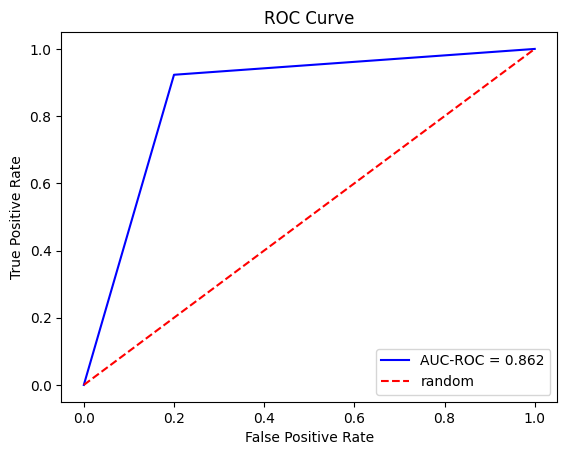

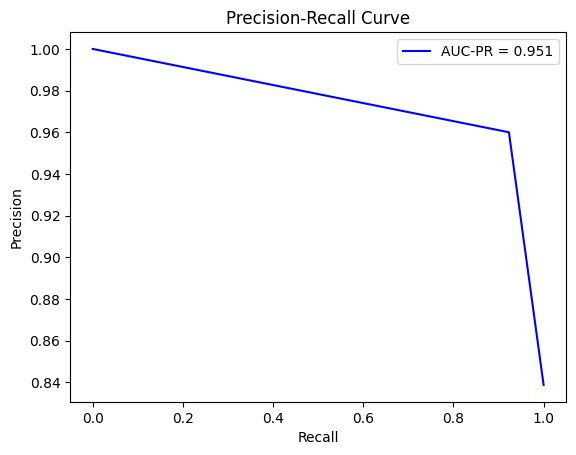

In [12]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

show_roc(y_test, y_pred)

# pr curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)

plt.plot(recall, precision, color='blue', label=f'AUC-PR = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Task 4

In [13]:
import xgboost as xgb

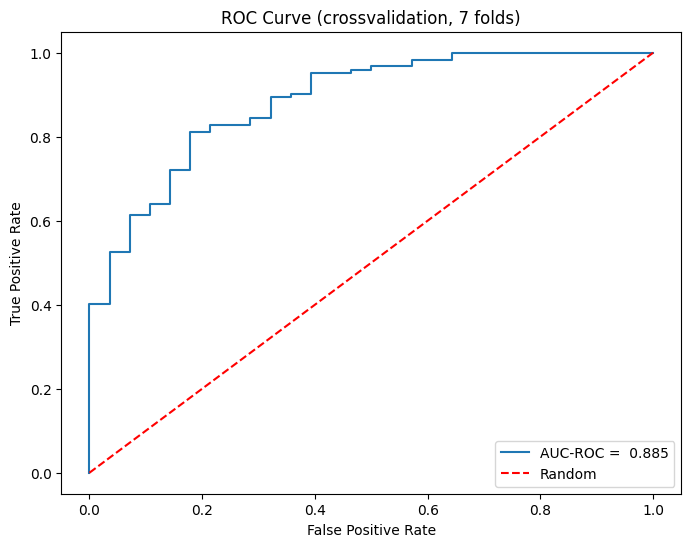

In [20]:
from sklearn.model_selection import cross_val_predict

model = xgb.XGBClassifier(n_estimators=180, max_depth=5, learning_rate=0.07, random_state=666, objective='binary:logistic', eval_metric='logloss')
y_scores = cross_val_predict(model, X_train, y_train, cv=7, method='predict_proba')

fpr, tpr, _ = roc_curve(y_train, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC =  {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (crossvalidation, 7 folds)')
plt.legend(loc='lower right')
plt.show()


## Task 5

In [15]:
from sklearn.metrics import accuracy_score

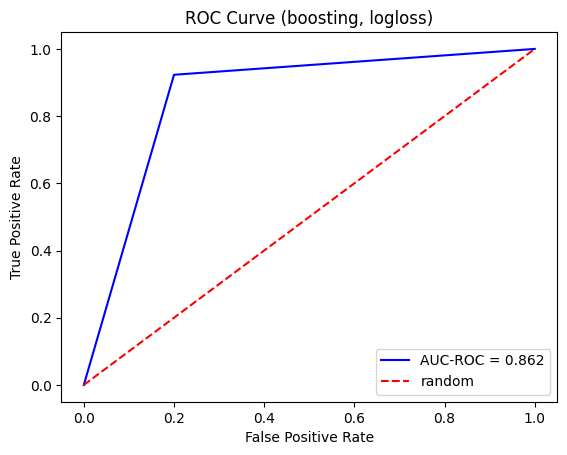

In [16]:
model = xgb.XGBClassifier(n_estimators=70, max_depth=3, learning_rate=0.15, random_state=666, objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

show_roc(y_test, y_pred, 'ROC Curve (boosting, logloss)')

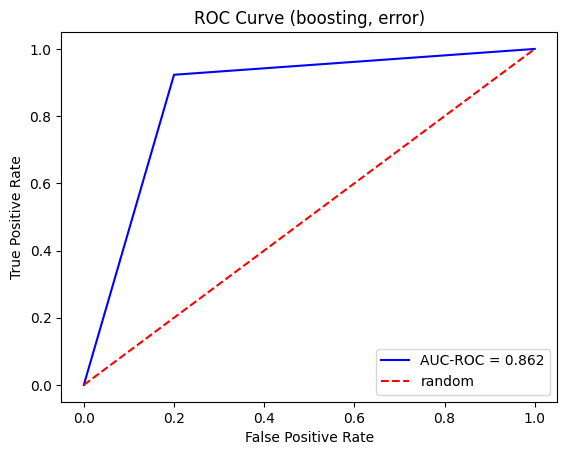

In [17]:
model = xgb.XGBClassifier(n_estimators=70, max_depth=3, learning_rate=0.15, random_state=666, objective='binary:logistic', eval_metric='error')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

show_roc(y_test, y_pred, 'ROC Curve (boosting, error)')

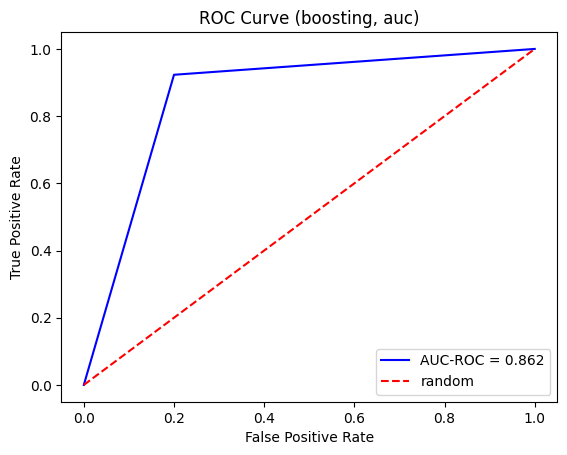

In [18]:
model = xgb.XGBClassifier(n_estimators=70, max_depth=3, learning_rate=0.15, random_state=666, objective='binary:logistic', eval_metric='auc')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

show_roc(y_test, y_pred, 'ROC Curve (boosting, auc)')

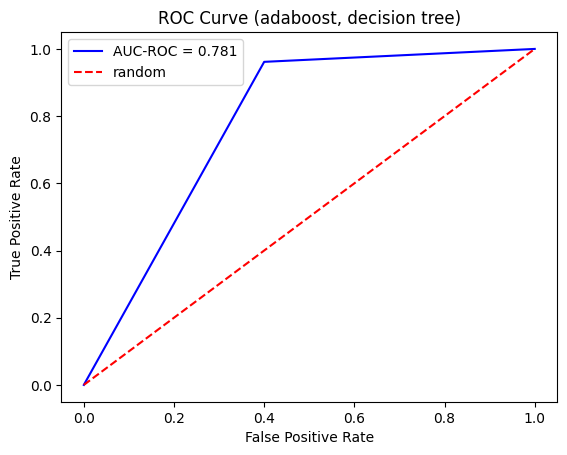

In [19]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=40, random_state=666)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

show_roc(y_test, y_pred, 'ROC Curve (adaboost, decision tree)')